# Airbnb Paris dataset analysis

### Datacamp 2021

Data source : http://insideairbnb.com/get-the-data.html

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as msno
%matplotlib inline

## Load Data

In [14]:
import zipfile
 
zip_file = "./dataset/airbnb_compressed.zip"

try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall("./dataset")
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [15]:
# df_main => cleaned summary of the dataset, good for visualisations
df_main = pd.read_csv('./dataset/airbnb_paris.csv', index_col='id')

# df_listings => detailed dataset with all collected columns
df_listings = pd.read_csv('./dataset/listings.csv', index_col='id')

In [16]:
df_main.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,102,2,273,2021-12-08,1.80,1,58,42,7510402838018
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,112,10,288,2021-12-05,2.22,2,209,19,7510400829623
7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,344,0,7510903576564
9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,117,0,"Available with a mobility lease only (""bail mo..."
9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,81,4,33,2021-10-22,0.31,1,260,7,7511101582862


In [17]:
# https://python-visualization.github.io/folium/
import folium, folium.plugins 
paris_location = [48.86, 2.34]
map = folium.Map(location=paris_location, zoom_start=12)
folium.plugins.FastMarkerCluster(data=df_main[['latitude', 'longitude']]).add_to(map)
map.save( 'map.html')
map

In [18]:
df_listings.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
5396,https://www.airbnb.com/rooms/5396,20211207182322,2021-12-09,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,...,4.81,4.96,4.53,7510402838018,f,1,1,0,0,1.80
7397,https://www.airbnb.com/rooms/7397,20211207182322,2021-12-09,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,...,4.88,4.92,4.71,7510400829623,f,2,2,0,0,2.22
7964,https://www.airbnb.com/rooms/7964,20211207182322,2021-12-08,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,NaN,https://a0.muscache.com/pictures/4471349/6fb3d...,22155,https://www.airbnb.com/users/show/22155,Anaïs,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.04
9359,https://www.airbnb.com/rooms/9359,20211207182322,2021-12-09,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,https://www.airbnb.com/users/show/28422,Bernadette,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
9952,https://www.airbnb.com/rooms/9952,20211207182322,2021-12-09,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...","Vibrant neighborhood, full of bars, cafés, fre...",https://a0.muscache.com/pictures/ae822d16-74d2...,33534,https://www.airbnb.com/users/show/33534,Elisabeth,...,4.91,4.91,4.94,7511101582862,f,1,1,0,0,0.31


In [19]:
df_main.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [20]:
# display columns that are not already in df_main
for elt in df_listings.columns:
    if elt not in df_main.columns:
        print(elt, "(",df_listings[elt].dtype, ")", end=', ')

listing_url ( object ), scrape_id ( int64 ), last_scraped ( object ), description ( object ), neighborhood_overview ( object ), picture_url ( object ), host_url ( object ), host_since ( object ), host_location ( object ), host_about ( object ), host_response_time ( object ), host_response_rate ( object ), host_acceptance_rate ( object ), host_is_superhost ( object ), host_thumbnail_url ( object ), host_picture_url ( object ), host_neighbourhood ( object ), host_listings_count ( float64 ), host_total_listings_count ( float64 ), host_verifications ( object ), host_has_profile_pic ( object ), host_identity_verified ( object ), neighbourhood_cleansed ( object ), neighbourhood_group_cleansed ( float64 ), property_type ( object ), accommodates ( int64 ), bathrooms ( float64 ), bathrooms_text ( object ), bedrooms ( float64 ), beds ( float64 ), amenities ( object ), maximum_nights ( int64 ), minimum_minimum_nights ( float64 ), maximum_minimum_nights ( float64 ), minimum_maximum_nights ( float6

In [21]:
# Data dictionary : https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896
listings_cols_to_keep = ["host_is_superhost",
                        "host_acceptance_rate",
                        "host_response_time",
                        "host_response_rate",
                        "host_acceptance_rate",
                        "accommodates", 
                        "bathrooms",
                        "bedrooms",
                        "beds",
                        "availability_60",
                        "number_of_reviews_l30d",
                        "availability_90",
                        "review_scores_accuracy",
                        "review_scores_cleanliness",
                        "review_scores_checkin",
                        "review_scores_communication",
                        "review_scores_location",
                        "review_scores_value"
                        # TODO Find More to add
                        ]
df = pd.merge(df_main, df_listings[listings_cols_to_keep], on='id', how='left')

In [22]:
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,beds,availability_60,number_of_reviews_l30d,availability_90,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,
5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,102,2,...,1.0,28,3,58,4.56,4.48,4.77,4.81,4.96,4.53
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,112,10,...,2.0,5,2,24,4.79,4.43,4.91,4.88,4.92,4.71
7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,130,6,...,1.0,39,0,69,5.00,5.00,5.00,5.00,5.00,5.00
9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,75,180,...,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.863730,2.370930,Entire home/apt,81,4,...,1.0,3,0,25,4.97,4.88,5.00,4.91,4.91,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53703809,Romantic Saint-Germain-des-Prés & Odeon ➳ NEW,23834078,Daniela,NaN,Luxembourg,48.851410,2.338214,Entire home/apt,290,30,...,4.0,54,0,84,NaN,NaN,NaN,NaN,NaN,NaN
53711459,CALM New deco APT.with a inner yard,418882378,Eléo,NaN,Opéra,48.877367,2.341647,Entire home/apt,88,1,...,1.0,39,0,69,NaN,NaN,NaN,NaN,NaN,NaN
53711747,Studio PAISIBLE for 2 in PARIS 20ème,435019549,Yassine,NaN,Ménilmontant,48.864185,2.404030,Entire home/apt,70,1,...,1.0,43,0,73,NaN,NaN,NaN,NaN,NaN,NaN


## Dealing with Missing Values

<AxesSubplot:>

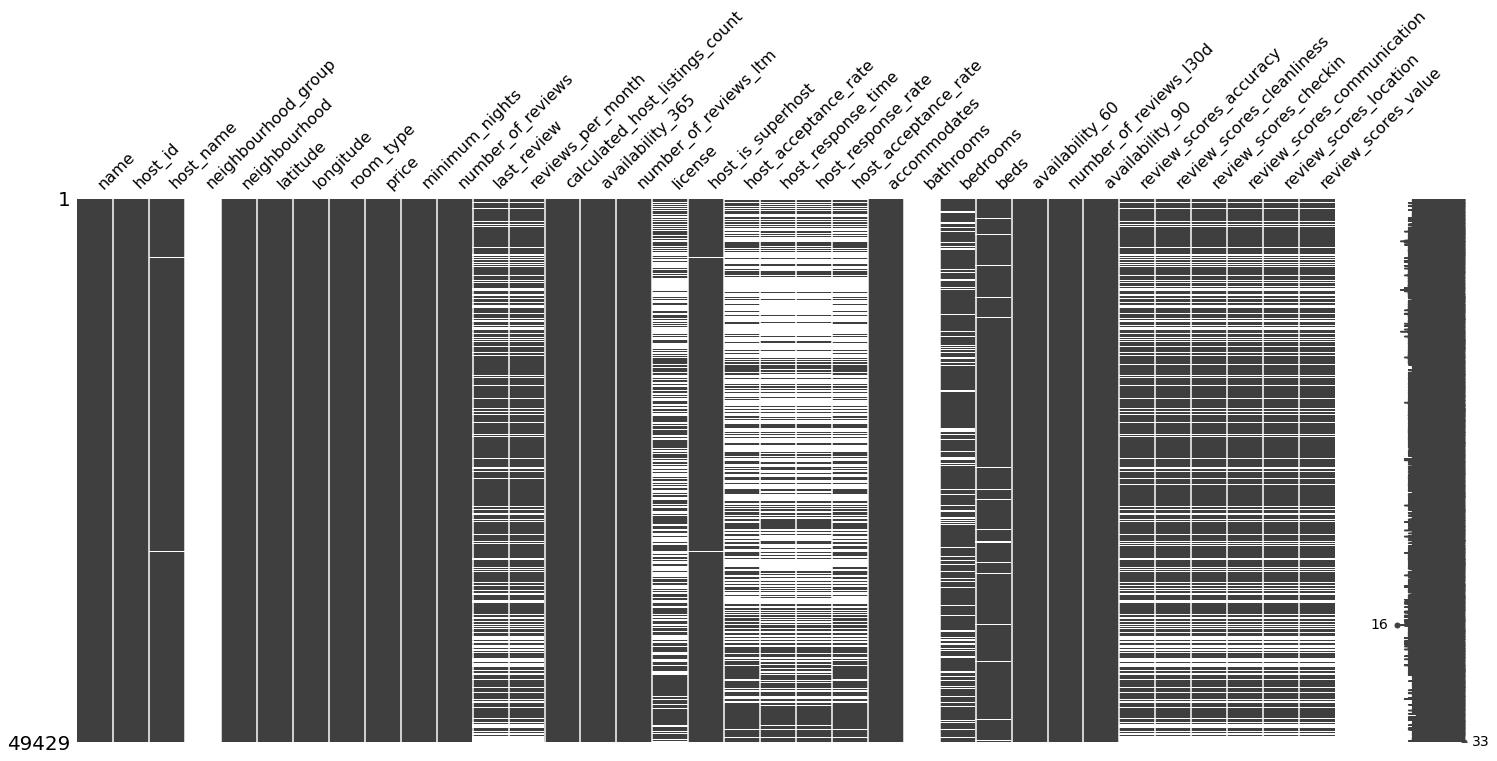

In [30]:
msno.matrix(df)

## Target variable description and metric choice

## First Model 

## Cross validation 